<h1 align="center" style="background-color:DodgerBlue;">Desafío - Gráficos y correlación</h1>

>● Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
>
>● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
>
>● Desarrollo desafío: Individual.
>
>● Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío -Gráficos y correlación.
### Habilidades a evaluar
>
>● Reconocer las funcionalidades avanzadas de gráficos estáticos mediante seaborn.
>
>● Aprender a realizar gráficos que muestren de forma estratificada el comportamiento de subconjuntos de elementos en la muestra.
>
>● Aplicar funciones a columnas de datos mediante ufuncs, map-reduce-filter.
>
>● Entender e interpretar la correlación a partir de diagramas de dispersión.
### Descripción
>La empresa para la cual trabajas, te ha solicitado continuar el análisis de datos pero, está vez, a partir de gráficos existentes y la correlación que existe entre ellos con la data disponible. Para ello, te entregan un material de apoyo el cual deberá servir como base para desarrollar los siguientes requerimientos.
>
>Requerimientos
>
>A continuación revisaremos los requerimientos y acciones que te han sido solicitados:
>
>1. Importar librerías y .csv. (2 punto) para ello:
>
>● Importe las librerías básicas para el análisis de datos
>
>● Descargue e importe el archivo nations.csv.
>
>Tip: El formato del archivo posee una codificación de tipo 'iso-8859-1'. Investigue cómo se puede solucionar este problema utilizando el argumento encoding de pd.read_csv.
>
>La base de datos contiene información a nivel mundial sobre demografía:
>
>● country: País.
>
>● region: Continente del país.
>
>● gdp: Producto Interno Bruto per cápita, precios 2005.
>
>● school: Promedio años de escolaridad.
>
>● adfert: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
>
>● chldmort: Probabilidad de muerte antes de los 5 años por cada 1000.
>
>● life: Esperanza de vida al nacer.
>
>● pop: Población total.
>
>● urban: Porcentaje de población urbana.
>
>● femlab: Tasa entre hombres y mujeres en el mercado laboral.
>
>● literacy: Tasa de alfabetismo.
>
>● co2: Toneladas de Co2 mitidas per cápita.
>
>● gini: Coeficiente de desigualdad del ingreso.
>
>● Apellidos desde la A hasta la N: Enfocarse en las variables chldmort, adfert y life.
>
>● Apellidos desde la M hasta la Z: Enfocarse en las variables femlab, literacy y school.


In [2]:
#1. Importar librerías y .csv. (2 punto) para ello:
#● Importe las librerías básicas para el análisis de datos

%matplotlib inline
import pandas as pd
import numpy as np
import lec4_graphs as gfx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
#● Descargue e importe el archivo nations.csv
df = pd.read_csv('datasets/nations.csv', encoding='latin-1')
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


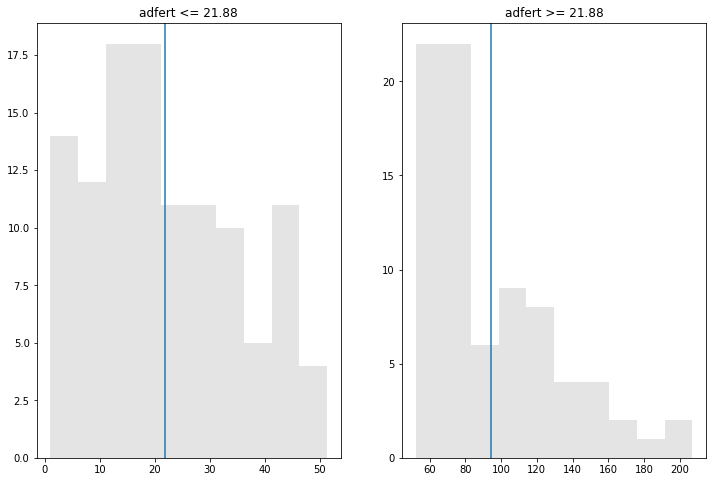

In [4]:
#2. Refactorizar gráficos matplotlib a seaborn (3 puntos). A partir de una serie de gráficos construidos con matplotlib, se solicita refactorizarlos utilizando seaborn.
# Además, se presenta la función que se utilizó para construirlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.
#● Histogramas
gfx.binarize_histogram(df, 'adfert')

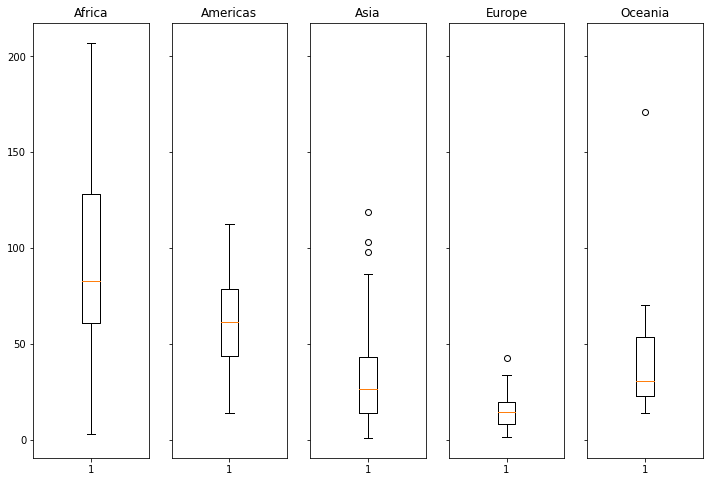

In [5]:
#● Boxplots
gfx.grouped_boxplot(df, 'adfert', 'region')

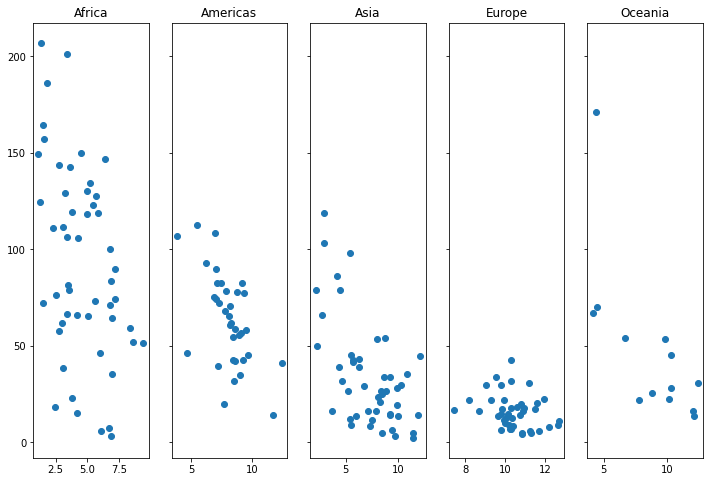

In [6]:
gfx.grouped_scatterplot(df, 'school', 'adfert', 'region')

>3. Generar un heatmap entre todas las variables (2 puntos): Con base en las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6
>
>4. A partir de las principales correlaciones, separarlas en un nuevo objeto y calcular la matriz de correlaciones para todas las regiones (3 puntos):
>
>● Comente brevemente las principales correlaciones a través de las regiones.
>
>Tip: Genere una nueva tabla segmentando con la siguiente sintaxis: = df.loc[:,['variables', 'a', 'agregar']]. N. No olvide agregar la variable región.
>
>Tip: Genere un loop para recorrer cada región y generar un heatmap.


In [7]:
region = df.loc[:,[ 'school', 'adfert','chldmort','life','literacy','co2','femlab','urban','gdp','region']]
region

,school,adfert,chldmort,life,literacy,co2,femlab,urban,gdp,region
0,6.716667,7.300000,34.75,72.316666,72.599998,15.00,0.4522,64.933334,7300.399902,Africa
1,3.100000,111.699997,122.75,54.733334,41.700001,1.20,0.8482,41.000000,1338.800049,Africa
2,8.600000,52.099998,60.25,52.250000,84.099998,9.20,0.8870,59.250000,12307.400391,Africa
3,1.300000,124.800003,170.50,53.783333,23.600000,0.20,0.8584,23.583334,1063.400024,Africa
4,2.483333,18.600000,168.50,48.866665,66.599998,0.10,1.0344,10.250000,349.200012,Africa
...,...,...,...,...,...,...,...,...,...,...
189,10.300000,28.299999,26.75,71.533333,98.800003,3.10,0.5010,20.666668,4012.600098,Oceania
190,4.500000,70.300003,36.00,66.500000,NaN,1.40,0.4858,17.766666,2249.199951,Oceania
191,10.133333,22.299999,19.25,71.833336,99.000000,4.85,0.7150,23.266666,4072.199951,Oceania
192,NaN,23.299999,36.50,66.033333,NaN,NaN,NaN,49.233334,NaN,Oceania


In [8]:
filter = region.filter(items=region).dropna()
filter

,school,adfert,chldmort,life,literacy,co2,femlab,urban,gdp,region
0,6.716667,7.300000,34.75,72.316666,72.599998,15.00,0.4522,64.933334,7300.399902,Africa
1,3.100000,111.699997,122.75,54.733334,41.700001,1.20,0.8482,41.000000,1338.800049,Africa
2,8.600000,52.099998,60.25,52.250000,84.099998,9.20,0.8870,59.250000,12307.400391,Africa
3,1.300000,124.800003,170.50,53.783333,23.600000,0.20,0.8584,23.583334,1063.400024,Africa
4,2.483333,18.600000,168.50,48.866665,66.599998,0.10,1.0344,10.250000,349.200012,Africa
...,...,...,...,...,...,...,...,...,...,...
179,4.400000,171.100006,170.00,49.666668,70.000000,2.25,0.8380,56.250000,4662.000000,Oceania
188,4.116667,66.900002,69.75,61.483334,60.099998,2.75,0.9656,12.516666,1953.800049,Oceania
189,10.300000,28.299999,26.75,71.533333,98.800003,3.10,0.5010,20.666668,4012.600098,Oceania
191,10.133333,22.299999,19.25,71.833336,99.000000,4.85,0.7150,23.266666,4072.199951,Oceania


<AxesSubplot:>

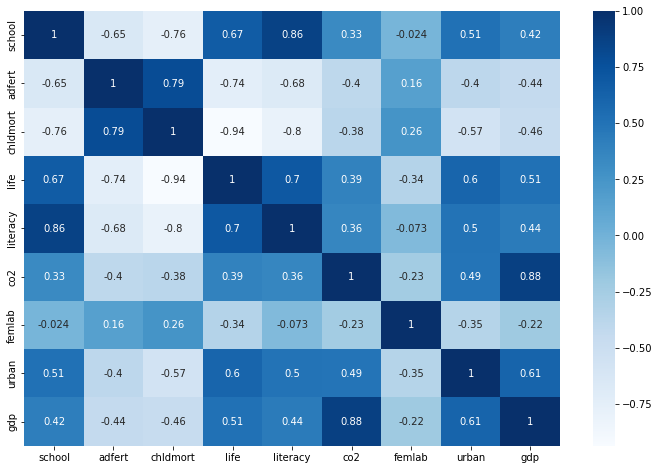

In [9]:
sns.heatmap(filter.corr(), cmap = 'Blues', annot = True)

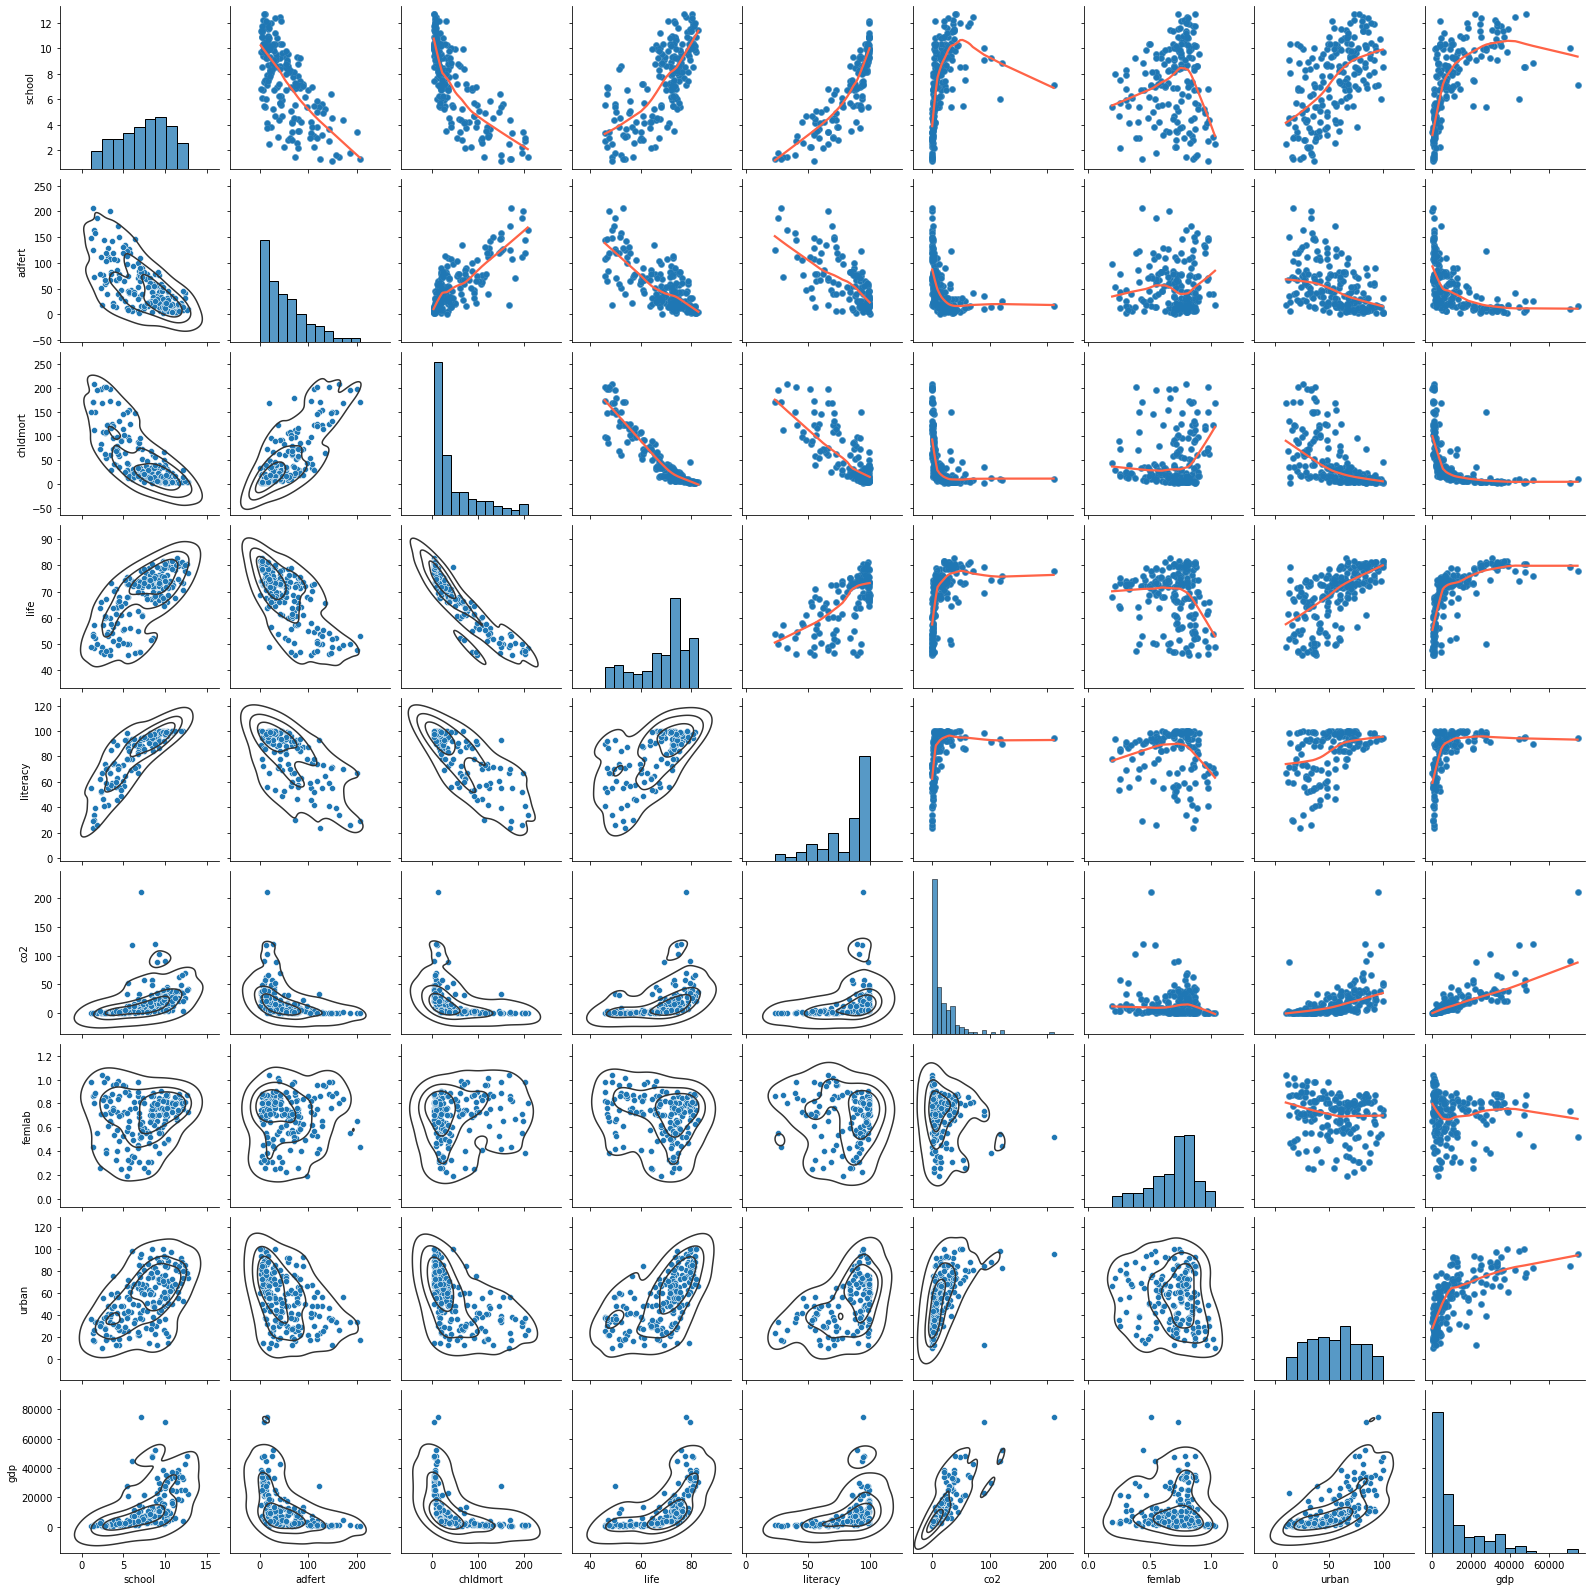

In [10]:
pairplot_1 = sns.pairplot(region, dropna = True).map_upper(sns.regplot, lowess = True, scatter_kws = {'alpha' : .5},
                                    line_kws = {'color': 'tomato'}).map_lower(sns.kdeplot, levels = 4, color='.2')

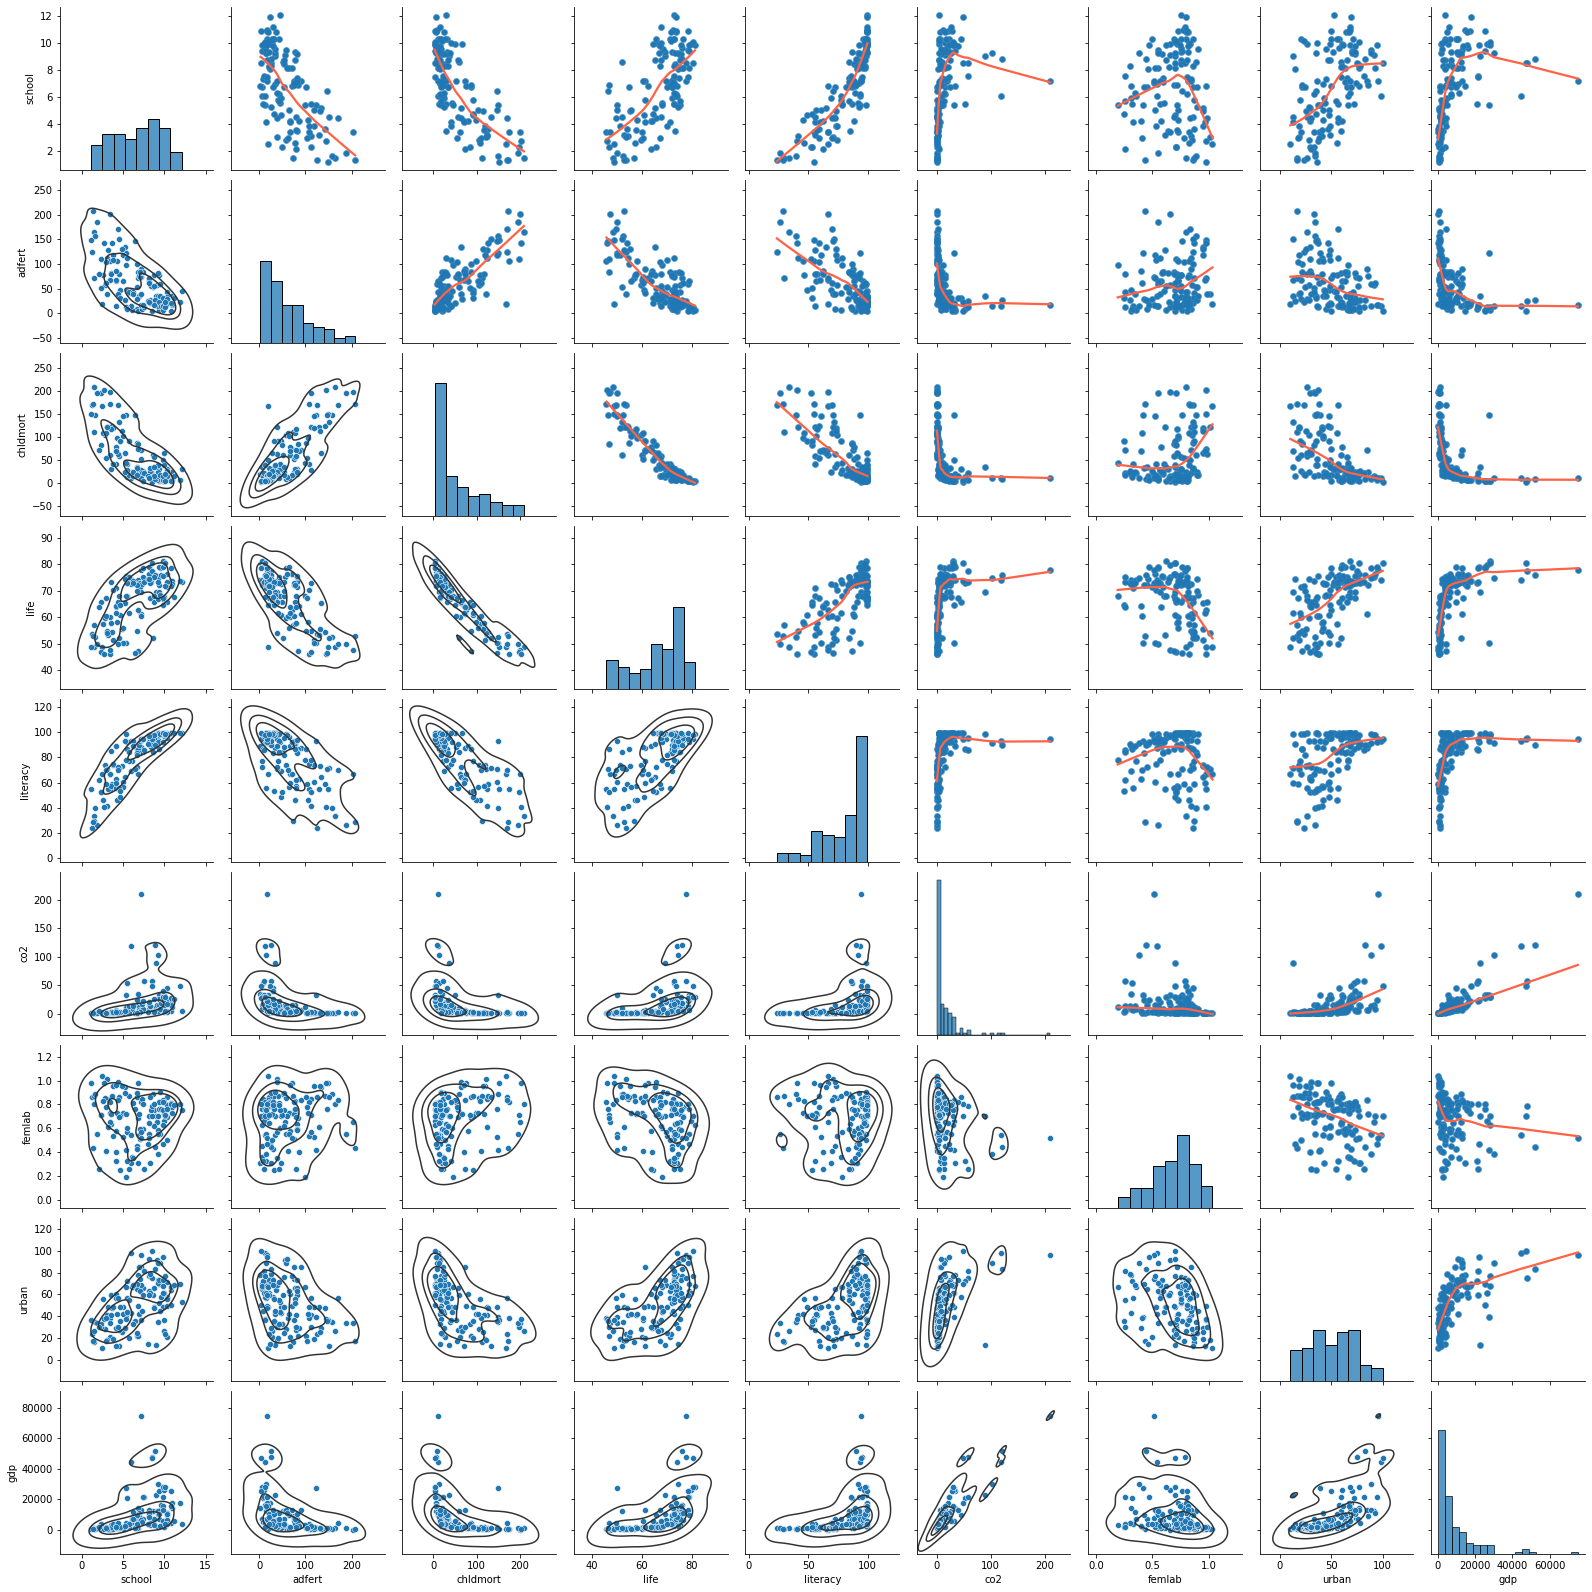

In [11]:
pairplot_1 = sns.pairplot(filter, dropna = True).map_upper(sns.regplot, lowess = True, scatter_kws = {'alpha' : .5},
                                    line_kws = {'color': 'tomato'}).map_lower(sns.kdeplot, levels = 4, color='.2')

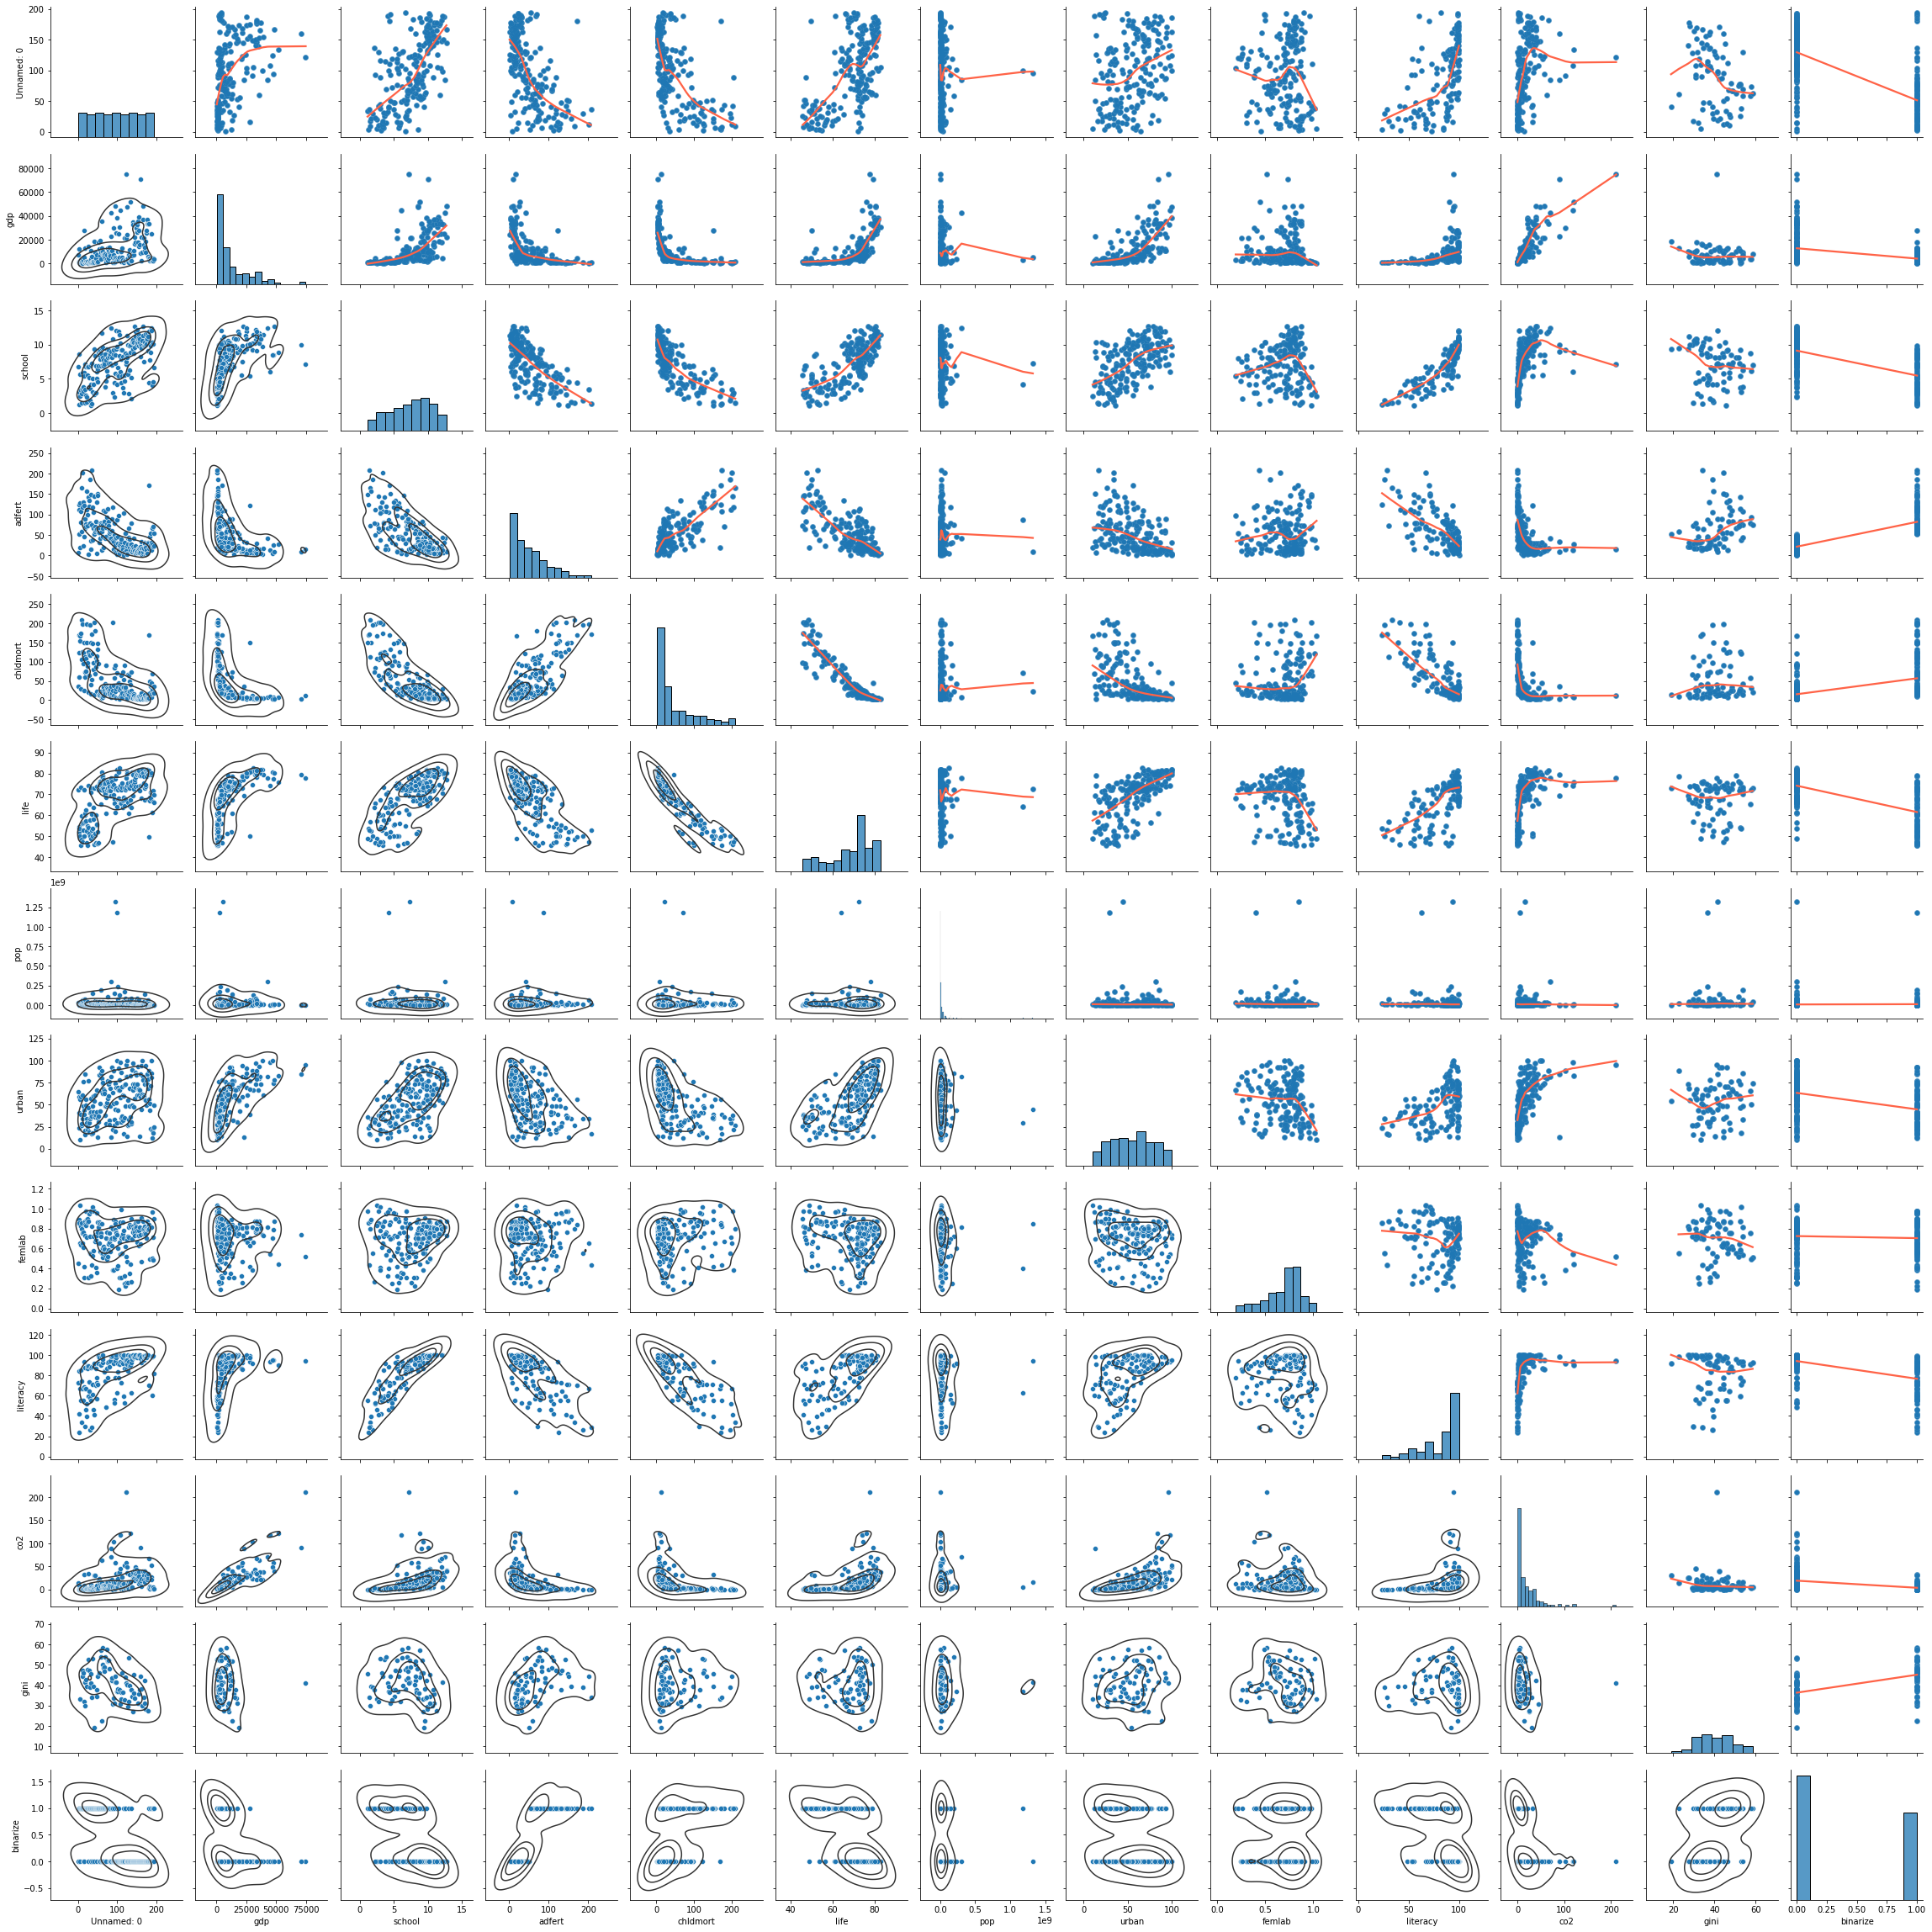

In [12]:
pairplot_1 = sns.pairplot(df, dropna = True).map_upper(sns.regplot, lowess = True, scatter_kws = {'alpha' : .5},
                                    line_kws = {'color': 'tomato'}).map_lower(sns.kdeplot, levels = 4, color='.2')

In [14]:
filter

,school,adfert,chldmort,life,literacy,co2,femlab,urban,gdp,region
0,6.716667,7.300000,34.75,72.316666,72.599998,15.00,0.4522,64.933334,7300.399902,Africa
1,3.100000,111.699997,122.75,54.733334,41.700001,1.20,0.8482,41.000000,1338.800049,Africa
2,8.600000,52.099998,60.25,52.250000,84.099998,9.20,0.8870,59.250000,12307.400391,Africa
3,1.300000,124.800003,170.50,53.783333,23.600000,0.20,0.8584,23.583334,1063.400024,Africa
4,2.483333,18.600000,168.50,48.866665,66.599998,0.10,1.0344,10.250000,349.200012,Africa
...,...,...,...,...,...,...,...,...,...,...
179,4.400000,171.100006,170.00,49.666668,70.000000,2.25,0.8380,56.250000,4662.000000,Oceania
188,4.116667,66.900002,69.75,61.483334,60.099998,2.75,0.9656,12.516666,1953.800049,Oceania
189,10.300000,28.299999,26.75,71.533333,98.800003,3.10,0.5010,20.666668,4012.600098,Oceania
191,10.133333,22.299999,19.25,71.833336,99.000000,4.85,0.7150,23.266666,4072.199951,Oceania


c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\dmard\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

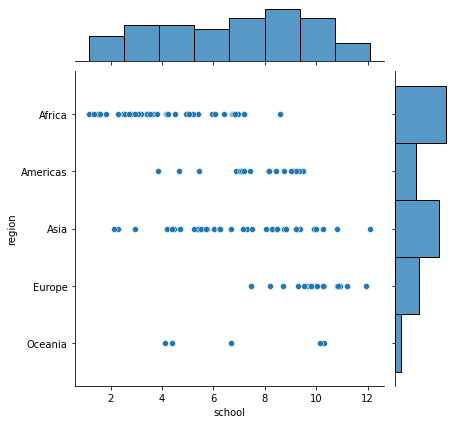

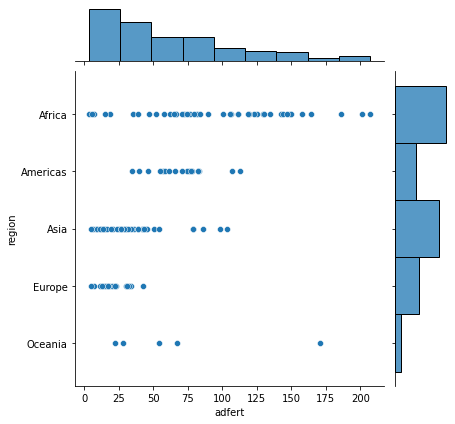

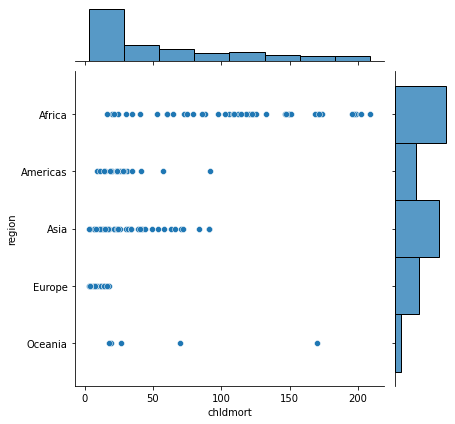

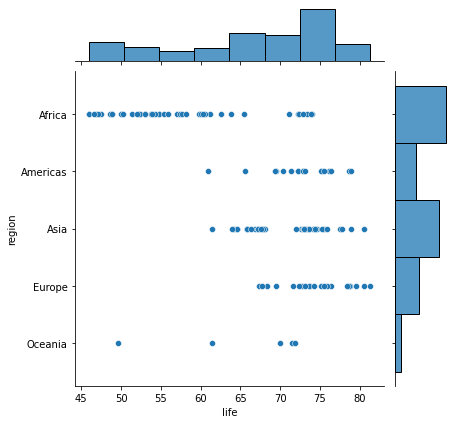

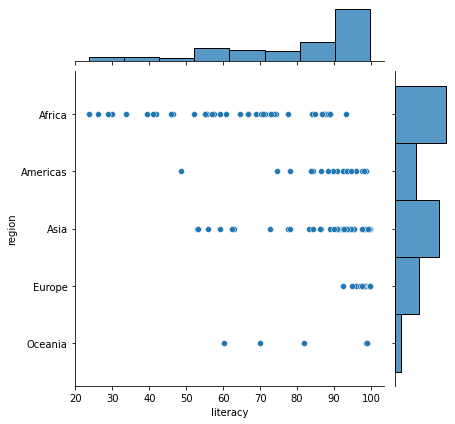

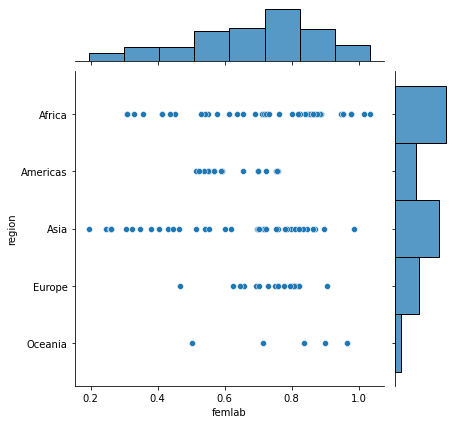

In [15]:
sns.jointplot(filter['school'],filter['region'])#, kind = 'reg'
sns.jointplot(filter['adfert'],filter['region'])
sns.jointplot(filter['chldmort'],filter['region'])
sns.jointplot(filter['life'],filter['region'])
sns.jointplot(filter['literacy'],filter['region'])
sns.jointplot(filter['femlab'],filter['region'])

In [27]:
df_def = region.loc[:, ['region', 'adfert', 'chldmort', "life"]]
df_def

,region,adfert,chldmort,life
0,Africa,7.300000,34.75,72.316666
1,Africa,111.699997,122.75,54.733334
2,Africa,52.099998,60.25,52.250000
3,Africa,124.800003,170.50,53.783333
4,Africa,18.600000,168.50,48.866665
...,...,...,...,...
189,Oceania,28.299999,26.75,71.533333
190,Oceania,70.300003,36.00,66.500000
191,Oceania,22.299999,19.25,71.833336
192,Oceania,23.299999,36.50,66.033333


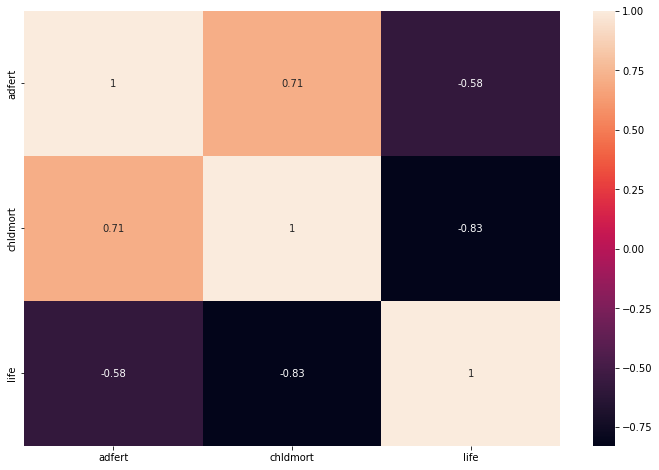

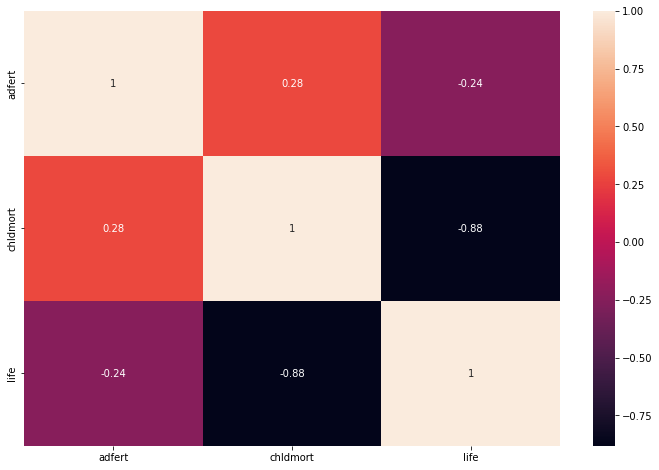

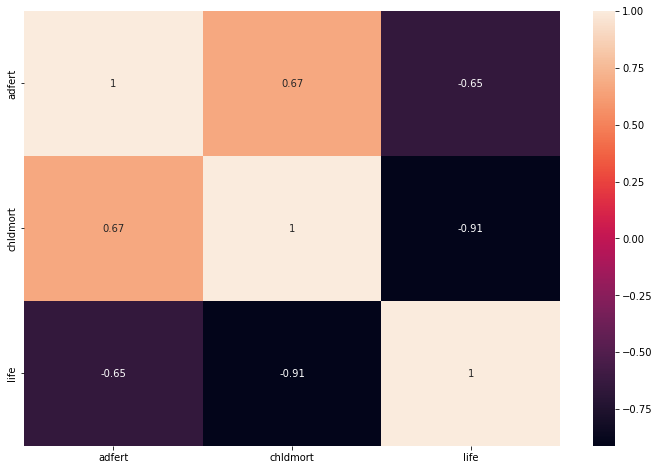

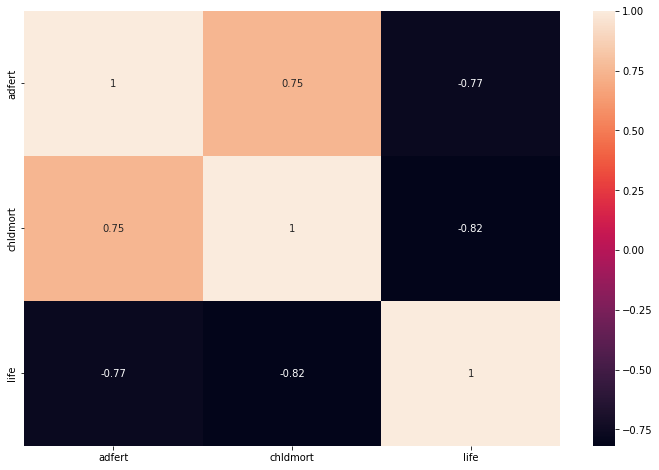

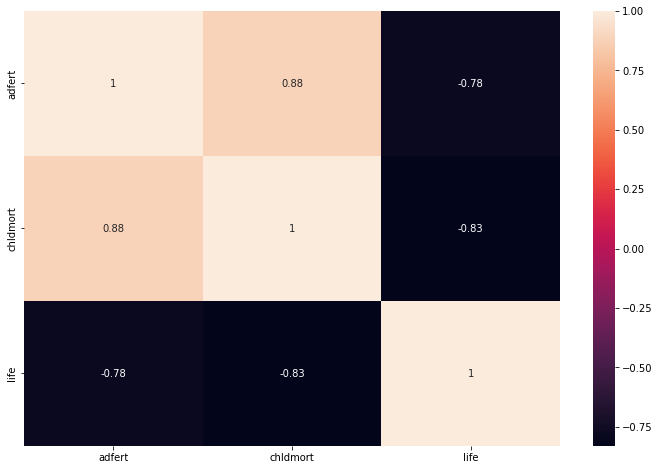

In [29]:
for i in df_def['region'].unique():
    plt.figure()
    sns.heatmap(df_def[df_def['region'] == i].corr(), annot=True)